In [1]:
import pandas as pd


In [2]:
data = {
    "EmployeeID": [75, 75, 75, 82, 82, 93, 93],
    "Name": ["Alia", "Alia", "Alia", "Satish", "Satish", "Charan", "Charan"],
    "Date": ["2025-01-01", "2025-01-02", "2025-01-03",
             "2025-01-01", "2025-01-02",
             "2025-01-01", "2025-01-02"],
    "Status": ["Present", "Absent", "Present",
               "Present", "Present",
               "Absent", "Present"]
}

attendance_df = pd.DataFrame(data)
attendance_df


,EmployeeID,Name,Date,Status
0,75,Alia,2025-01-01,Present
1,75,Alia,2025-01-02,Absent
2,75,Alia,2025-01-03,Present
3,82,Satish,2025-01-01,Present
4,82,Satish,2025-01-02,Present
5,93,Charan,2025-01-01,Absent
6,93,Charan,2025-01-02,Present


In [3]:
attendance_count = attendance_df.groupby(
    ["EmployeeID", "Name", "Status"]
).size().unstack(fill_value=0)

attendance_count


,Status,Absent,Present
EmployeeID,Name,,
75,Alia,1,2
82,Satish,0,2
93,Charan,1,1


In [4]:
attendance_count["Total Days"] = attendance_count.sum(axis=1)
attendance_count


,Status,Absent,Present,Total Days
EmployeeID,Name,,,
75,Alia,1,2,3
82,Satish,0,2,2
93,Charan,1,1,2


In [5]:
attendance_count["Attendance Percentage"] = (
    attendance_count["Present"] / attendance_count["Total Days"]
) * 100

attendance_count


,Status,Absent,Present,Total Days,Attendance Percentage
EmployeeID,Name,,,,
75,Alia,1,2,3,66.666667
82,Satish,0,2,2,100.000000
93,Charan,1,1,2,50.000000


In [6]:
#for low Attendance
low_attendance = attendance_count[
    attendance_count["Attendance Percentage"] < 75
]

low_attendance


,Status,Absent,Present,Total Days,Attendance Percentage
EmployeeID,Name,,,,
75,Alia,1,2,3,66.666667
93,Charan,1,1,2,50.000000


In [7]:
import matplotlib.pyplot as plt


In [8]:
attendance_count["Attendance Percentage"]


EmployeeID  Name  
75          Alia       66.666667
82          Satish    100.000000
93          Charan     50.000000
Name: Attendance Percentage, dtype: float64

<Axes: title={'center': 'Employee Attendance Percentage'}, xlabel='EmployeeID,Name'>

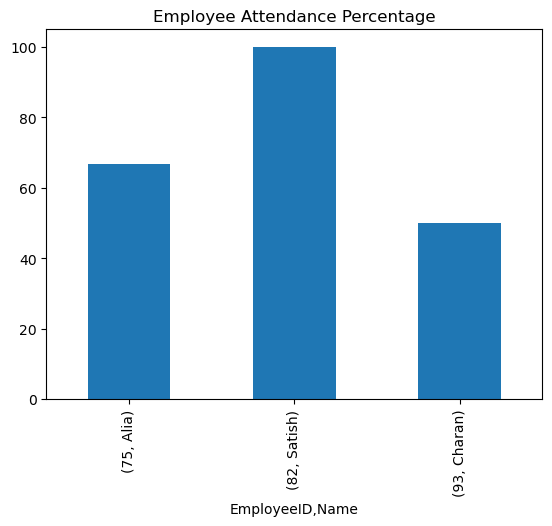

In [9]:
attendance_count["Attendance Percentage"].plot(
    kind="bar",
    title="Employee Attendance Percentage"
)


Text(0, 0.5, 'Attendance Percentage')

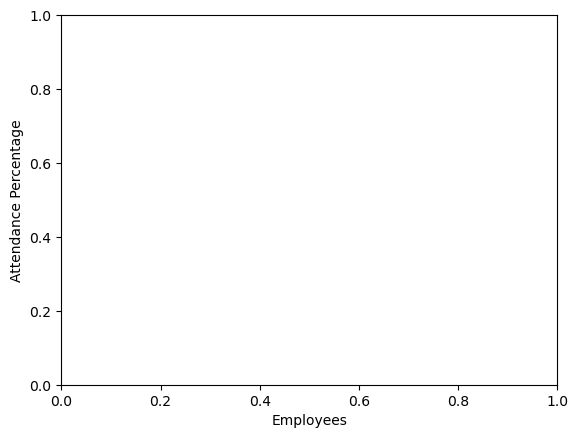

In [10]:
plt.xlabel("Employees")
plt.ylabel("Attendance Percentage")


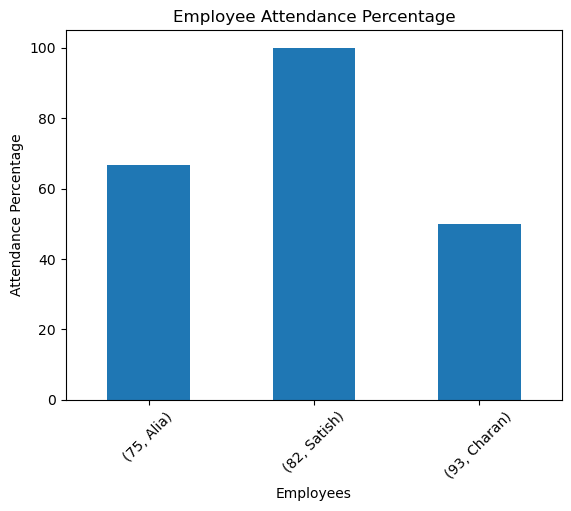

In [12]:
import matplotlib.pyplot as plt

attendance_count["Attendance Percentage"].plot(
    kind="bar",
    title="Employee Attendance Percentage"
)

plt.xlabel("Employees")
plt.ylabel("Attendance Percentage")
plt.xticks(rotation=45)
plt.show()


In [14]:
attendance_count.to_csv("final_attendance_report.csv")
